/tmp/ipykernel_57434/4069023793.py:30: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[i, 1].hist(images[i].ravel(), 256, [0, 256], color="gray")


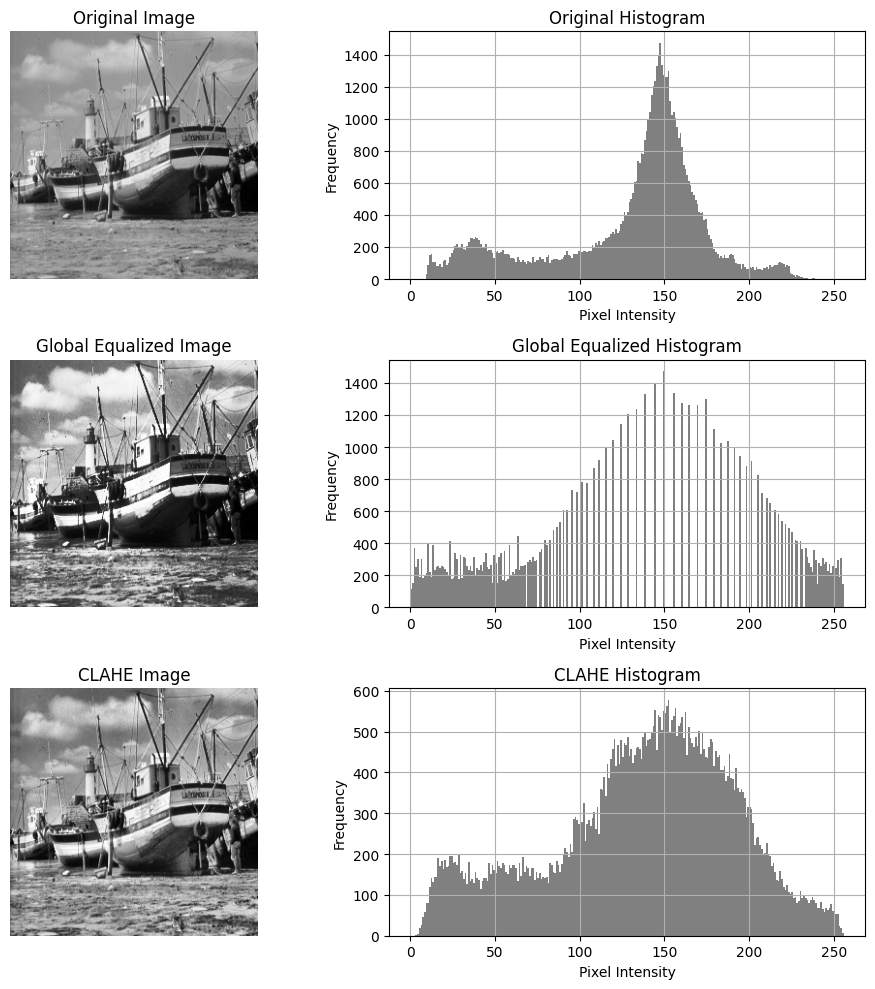

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread("stdimgs/boat.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))

# Global histogram equalization
global_eq = cv2.equalizeHist(image)

# Adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_eq = clahe.apply(image)

# Titles and images
titles = ["Original", "Global Equalized", "CLAHE"]
images = [image, global_eq, clahe_eq]

# Create one big figure
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i in range(3):
    # Image
    axs[i, 0].imshow(images[i], cmap="gray")
    axs[i, 0].set_title(f"{titles[i]} Image")
    axs[i, 0].axis("off")

    # Histogram
    axs[i, 1].hist(images[i].ravel(), 256, [0, 256], color="gray")
    axs[i, 1].set_title(f"{titles[i]} Histogram")
    axs[i, 1].set_xlabel("Pixel Intensity")
    axs[i, 1].set_ylabel("Frequency")
    axs[i, 1].grid()

plt.tight_layout()
plt.show()